# Chuẩn bị dữ liệu

#### import thư viện

In [129]:
import math
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

import seaborn as sns

#### Thêm data

In [130]:
df = pd.read_csv('./data/FPT Historical Data_with_NaN.csv')

#### xem sơ bộ data

In [131]:
df.shape

(3032, 7)

In [132]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02/29/2024,"109,000.0","108,200.0","109,400.0","107,700.0",2.82M,0.46%
1,02/28/2024,"108,500.0","108,000.0","108,500.0","106,300.0",3.46M,0.56%
2,02/27/2024,"107,900.0","108,500.0","109,500.0","107,400.0",2.80M,-0.09%
3,02/26/2024,"108,000.0","103,900.0","108,000.0","103,500.0",4.47M,3.95%
4,02/23/2024,"103,900.0","105,500.0","106,700.0","103,300.0",4.10M,-0.67%


# Tiền xử lí dữ liệu

##### Kiểm tra type

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3032 non-null   object
 1   Price     2982 non-null   object
 2   Open      2982 non-null   object
 3   High      2982 non-null   object
 4   Low       2982 non-null   object
 5   Vol.      2982 non-null   object
 6   Change %  2982 non-null   object
dtypes: object(7)
memory usage: 165.9+ KB


#### Sửa các giá trị Price, Open, High, Low thành float. Đặt Date thành index

In [134]:
df["Date"] = pd.to_datetime(df.Date,format="%m/%d/%Y")

df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)

#### Sửa các kí tự K, M, B của Vol, đặt giá trị thành float.

In [135]:
import re

def convert_to_float(x):
    if isinstance(x, str):
        number_part = re.findall(r'\d*\.?\d+', x)[0]
        unit_part = re.sub(r'\d*\.?\d+', '', x)

        if unit_part == 'K':
            multiplier = 1000
        elif unit_part == 'M':
            multiplier = 1000000
        elif unit_part == 'B':
            multiplier = 1000000000
        else:
            multiplier = 1

        return float(number_part) * multiplier
    else:
        return x

df['Vol.'] = df['Vol.'].apply(convert_to_float)


#### Loại bỏ kí tự %, chuyển thành dạng float

In [136]:
df['Change %'] = df['Change %'].str.rstrip('%')

df['Change %'] = df['Change %'].astype(float)

#### Xem lại dữ liệu đã được chuyển thành float chưa

In [137]:
print(df)

           Date     Price      Open      High       Low       Vol.  Change %
0    2024-02-29  109000.0  108200.0  109400.0  107700.0  2820000.0      0.46
1    2024-02-28  108500.0  108000.0  108500.0  106300.0  3460000.0      0.56
2    2024-02-27  107900.0  108500.0  109500.0  107400.0  2800000.0     -0.09
3    2024-02-26  108000.0  103900.0  108000.0  103500.0  4470000.0      3.95
4    2024-02-23  103900.0  105500.0  106700.0  103300.0  4100000.0     -0.67
...         ...       ...       ...       ...       ...        ...       ...
3027 2012-01-09    6742.5    6714.9    6742.5    6659.6   219830.0      0.41
3028 2012-01-06    6714.9    6701.1    6714.9    6673.4   315300.0      0.83
3029 2012-01-05    6659.6    6673.4    6756.3    6645.8   309570.0     -2.03
3030 2012-01-04    6797.8    6811.6    6811.6    6784.0   141740.0      0.00
3031 2012-01-03    6797.8    6562.9    6825.4    6562.9   356900.0     -1.01

[3032 rows x 7 columns]


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3032 non-null   datetime64[ns]
 1   Price     2982 non-null   float64       
 2   Open      2982 non-null   float64       
 3   High      2982 non-null   float64       
 4   Low       2982 non-null   float64       
 5   Vol.      2982 non-null   float64       
 6   Change %  2982 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 165.9 KB


#### Kiểm tra các giá trị null, NaN và sửa bằng phương pháp nội suy

In [139]:
df.isna().sum()
df.isnull().sum()

Date         0
Price       50
Open        50
High        50
Low         50
Vol.        50
Change %    50
dtype: int64

In [140]:
df = df.interpolate()

print(df)


           Date     Price      Open      High       Low       Vol.  Change %
0    2024-02-29  109000.0  108200.0  109400.0  107700.0  2820000.0      0.46
1    2024-02-28  108500.0  108000.0  108500.0  106300.0  3460000.0      0.56
2    2024-02-27  107900.0  108500.0  109500.0  107400.0  2800000.0     -0.09
3    2024-02-26  108000.0  103900.0  108000.0  103500.0  4470000.0      3.95
4    2024-02-23  103900.0  105500.0  106700.0  103300.0  4100000.0     -0.67
...         ...       ...       ...       ...       ...        ...       ...
3027 2012-01-09    6742.5    6714.9    6742.5    6659.6   219830.0      0.41
3028 2012-01-06    6714.9    6701.1    6714.9    6673.4   315300.0      0.83
3029 2012-01-05    6659.6    6673.4    6756.3    6645.8   309570.0     -2.03
3030 2012-01-04    6797.8    6811.6    6811.6    6784.0   141740.0      0.00
3031 2012-01-03    6797.8    6562.9    6825.4    6562.9   356900.0     -1.01

[3032 rows x 7 columns]


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3032 non-null   datetime64[ns]
 1   Price     3032 non-null   float64       
 2   Open      3032 non-null   float64       
 3   High      3032 non-null   float64       
 4   Low       3032 non-null   float64       
 5   Vol.      3032 non-null   float64       
 6   Change %  3032 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 165.9 KB


In [142]:
df.isna().sum()
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [143]:
df.set_index("Date", inplace=True)

# Mô tả dữ liệu

In [144]:
df.describe()

,Price,Open,High,Low,Vol.,Change %
count,3032.000000,3032.000000,3032.000000,3032.000000,3.032000e+03,3032.000000
mean,33815.471075,33807.120861,34176.956712,33463.373747,2.069698e+06,0.107932
std,28572.021523,28561.133581,28886.658638,28246.910149,1.643621e+06,1.608871
min,5840.900000,5786.900000,5876.800000,5769.000000,1.897000e+04,-14.020000
25%,12751.025000,12751.025000,12997.487500,12611.200000,9.159175e+05,-0.650000
50%,22022.400000,22068.250000,22208.600000,21882.800000,1.640000e+06,0.000000
75%,52755.750000,52685.500000,53229.900000,52334.050000,2.720000e+06,0.860000
max,109000.000000,108500.000000,109500.000000,107700.000000,1.217000e+07,7.000000


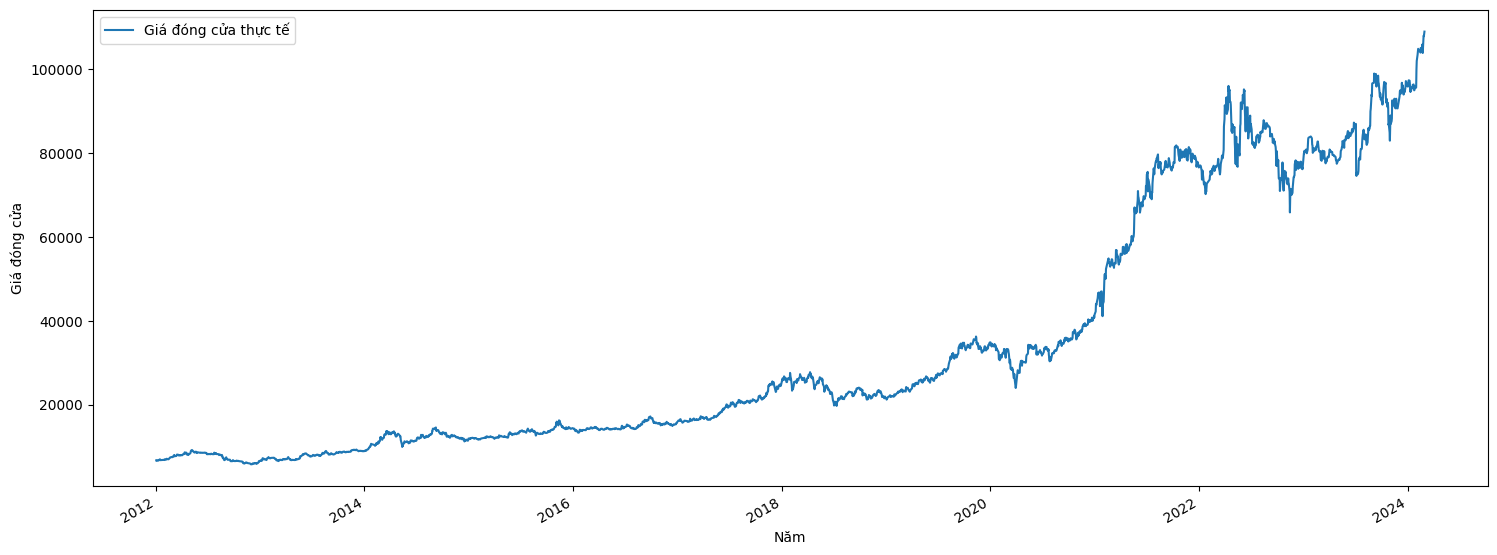

In [145]:
fig, ax = plt.subplots(figsize=(18, 7))
df['Price'].plot(label = 'Giá đóng cửa thực tế')
ax.set_xlabel('Năm')
ax.set_ylabel('Giá đóng cửa')
plt.legend(loc='best')
plt.show()

## Test classification

In [146]:
test_df = df.copy

pi = pd.DataFrame(df['Price'], columns=['Price'])

pi = pi.iloc[::-1]

# Reset chỉ mục
pi.reset_index(drop=True, inplace=True)

In [147]:
pi['Label'] = None
pi.reset_index(drop=True, inplace=True)
rows, cols = pi.shape

pi.head()

,Price,Label
0,6797.8,None
1,6797.8,None
2,6659.6,None
3,6714.9,None
4,6742.5,None


In [148]:
pi_list = pi['Price'].values.tolist()

print(pi_list)

[6797.8, 6797.8, 6659.6, 6714.9, 6742.5, 6839.2, 6839.2, 6784.0, 6908.3, 7046.5, 6839.2, 6839.2, 6866.9, 6866.9, 6908.3, 6866.9, 6977.4, 7046.5, 6977.4, 6977.4, 6977.4, 7115.6, 7184.7, 7115.6, 7046.5, 7046.5, 7046.5, 7115.6, 7184.7, 7461.0, 7461.0, 7530.1, 7530.1, 7530.1, 7599.2, 7530.1, 7599.2, 7599.2, 7668.2, 8013.7, 7737.3, 7944.6, 7806.4, 7806.4, 7806.4, 7875.5, 7875.5, 8151.8, 8151.8, 8151.8, 8082.7, 8082.7, 7944.6, 8013.7, 8013.7, 7944.6, 8013.7, 8013.7, 8013.7, 8013.7, 8117.299999999999, 8220.9, 8220.9, 8290.0, 8290.0, 8635.4, 8704.5, 8428.2, 8566.3, 8635.4, 8566.3, 8220.9, 8151.8, 8082.7, 8290.0, 8359.1, 8220.9, 8220.9, 8566.3, 8980.8, 9119.0, 9257.2, 9188.1, 9119.0, 9049.9, 8911.7, 8842.7, 8684.8, 8649.7, 8737.4, 8798.8, 8860.2, 8737.4, 8561.9, 8526.9, 8702.3, 8702.3, 8684.8, 8702.3, 8667.2, 8649.7, 8597.0, 8597.0, 8649.7, 8649.7, 8597.0, 8614.6, 8597.0, 8597.0, 8561.9, 8588.25, 8614.6, 8614.6, 8649.7, 8632.1, 8597.0, 8597.0, 8526.9, 8526.9, 8263.7, 8263.7, 8263.7, 8246.1, 828

#### Công thức tính tham số

In [149]:
def Fi(p, i):
    f = 0
    for j in range(i+1, i+4):
        f += p[j]
    return f

def Bi(p,i):
    b = 0
    for j in range(i-2, i+1):
        b += p[j]
    return b

def oi(p, u, i):
    tong = 0
    for j in range(i - 2, i + 4):
        tong += (p[j] - u) ** 2
    return math.sqrt(tong / 6)

def ui(p, i):
    tong = 0
    for j in range(i - 2, i + 4):
        tong += p[j]
    return tong / 6

def di(Fi, Bi):
    return Fi-Bi



#### Gán nhãn

In [150]:
for i in range(3, len(pi_list)-3):
    p_Fi = Fi(pi_list, i)
    p_Bi = Bi(pi_list, i)
    p_ui = ui(pi_list, i)
    p_oi = oi(pi_list, p_ui, i)
    p_di = p_Fi - p_Bi
    
    if p_di > 300:
        if pi_list[i] > (p_ui+p_oi):
            pi.loc[i, 'Label'] = 'Rise plus'
        else: 
            pi.loc[i, 'Label'] = 'Rise'
    elif p_di < -300:
        if pi_list[i] < (p_ui-p_oi):
            pi.loc[i, 'Label'] = 'Fall plus'
        else: 
            pi.loc[i, 'Label'] = 'Fall'
    else:
        pi.loc[i, 'Label'] = 'Hold'

for i in range(0, 3):
    pi.loc[i, 'Label'] = 'Hold'

for i in range(len(pi_list)-3, len(pi_list)):
    pi.loc[i, 'Label'] = 'Hold'

In [151]:
pi = pi.iloc[::-1]

df['Label'] = pi['Label'].values

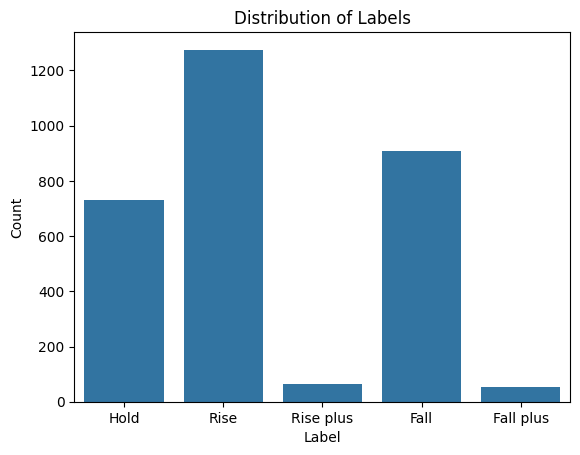

In [152]:


# Vẽ biểu đồ countplot
sns.countplot(data=df, x='Label')

# Đặt tiêu đề và nhãn cho trục
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.show()


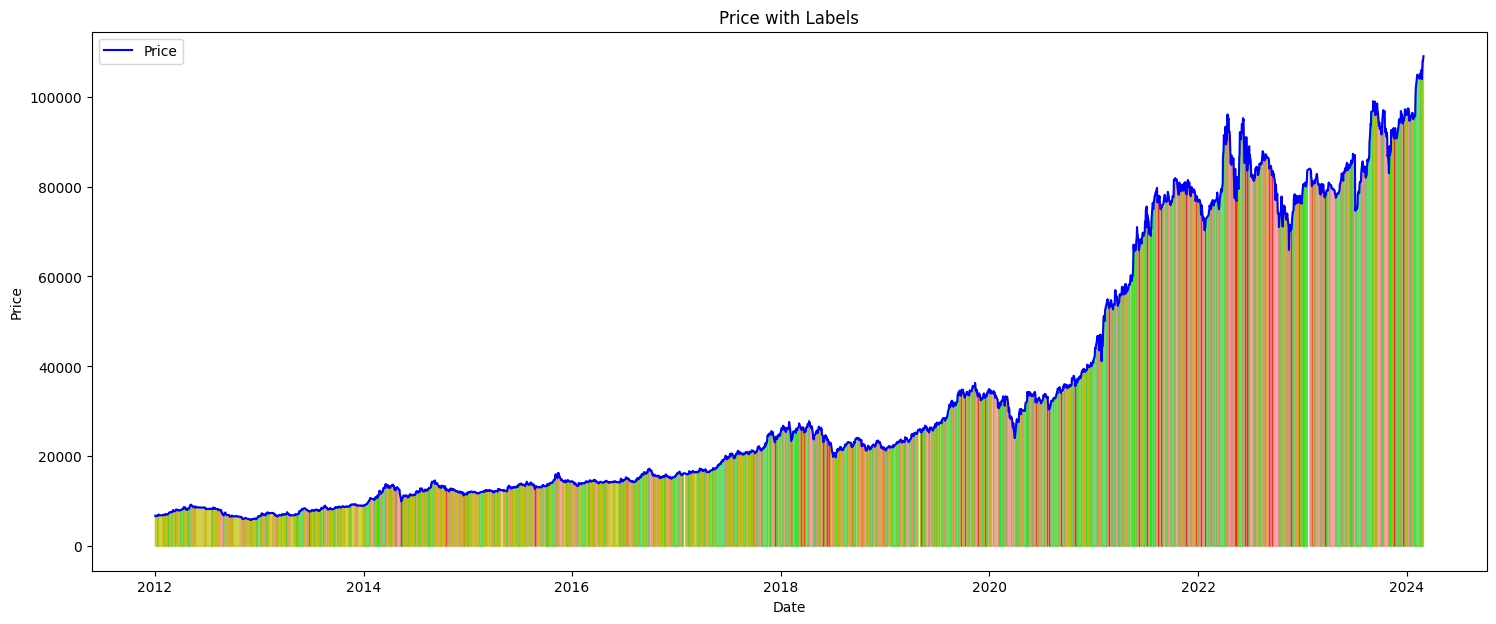

In [153]:
plt.figure(figsize=(18, 7))

# Vẽ biểu đồ đường cho feature "Price"
plt.plot(df.index, df['Price'], label='Price', color='blue')

# Tạo một dictionary để ánh xạ giữa nhãn và màu sắc
label_colors = {'Rise': 'limegreen', 'Rise plus': 'lime', 'Fall': 'lightcoral', 'Fall plus': 'red', 'Hold': 'y'}

# Duyệt qua các nhãn và tô màu cho các vùng tương ứng trên biểu đồ
for label, color in label_colors.items():
    mask = df['Label'] == label
    plt.fill_between(df.index, df['Price'], where=mask, color=color, alpha=0.7)
    # plt.fill_between(df.index, df['Price'], where=~mask, color=color, alpha=0.7)

# Đặt tiêu đề và nhãn cho trục
plt.title('Price with Labels')
plt.xlabel('Date')
plt.ylabel('Price')

# Hiển thị biểu đồ
plt.legend()
plt.show()

In [154]:
print(df['Label'].dtype)

# In ra các giá trị duy nhất của biến mục tiêu
print(df['Label'].unique())

object
['Hold' 'Rise' 'Rise plus' 'Fall' 'Fall plus']


# Chuẩn bị mô hình

#### Scale dữ liệu

In [155]:
features = ['Open', 'High', 'Low', 'Vol.', 'Change %']

scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])
X = pd.DataFrame(columns=features, data=X, index=df.index)  # Thêm index=df.index
X.head()

y = pd.DataFrame(df['Label'])

In [156]:
from imblearn.over_sampling import SMOTE

# Khởi tạo SMOTE
smote = SMOTE()

# Áp dụng SMOTE cho dữ liệu
X_resampled, y_resampled = smote.fit_resample(X, y)


In [157]:
X.to_csv('./data/FPT Historical Data_Demo.csv', index=True)

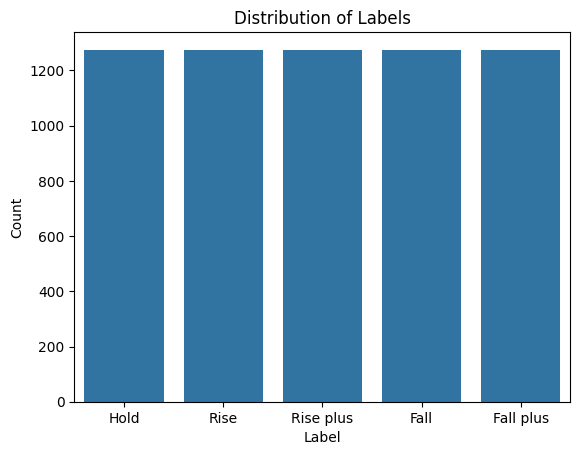

In [159]:
sns.countplot(data=y_resampled, x='Label')

# Đặt tiêu đề và nhãn cho trục
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.show()

In [160]:

timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(X_resampled):
        X_train, X_test = X_resampled[:len(train_index)], X_resampled[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = y_resampled[:len(train_index)].values.ravel(), y_resampled[len(train_index): (len(train_index)+len(test_index))].values.ravel()

## Model

In [161]:
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9067357512953368


# Trực quan hoá kết quả

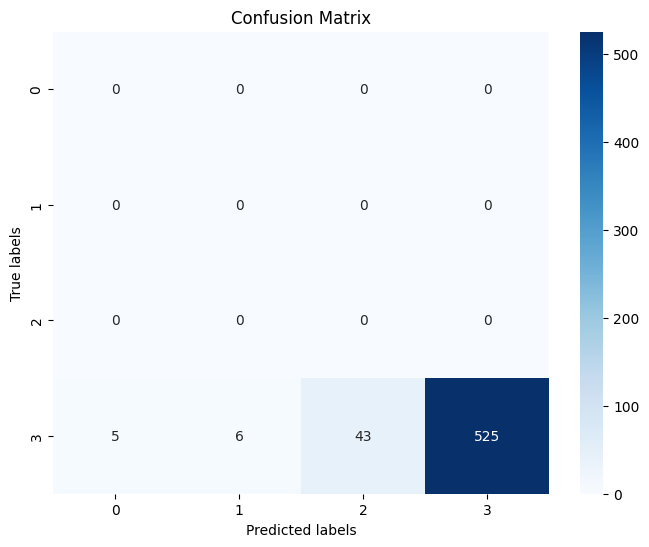

In [162]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


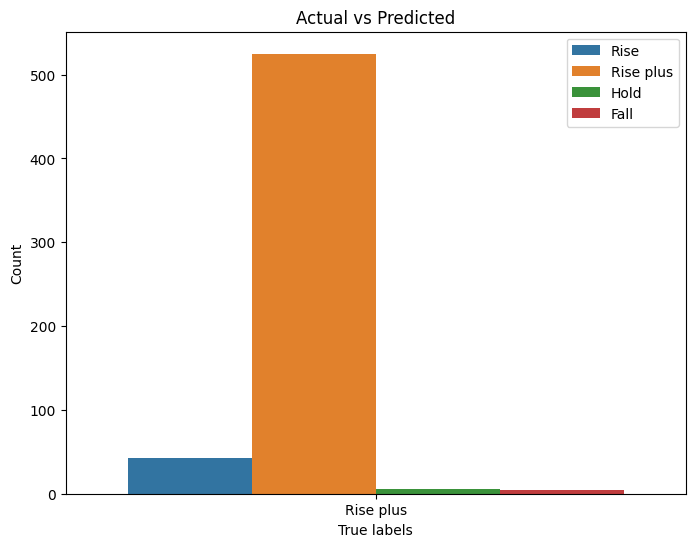

In [163]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, hue=y_pred)
plt.xlabel('True labels')
plt.ylabel('Count')
plt.title('Actual vs Predicted')
plt.show()


d:\python_workspace\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\python_workspace\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\python_workspace\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


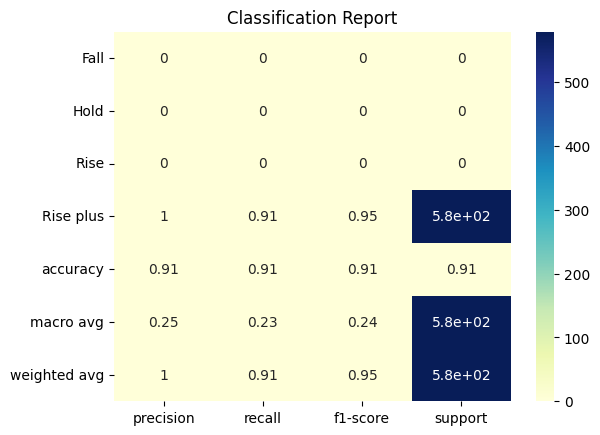

In [164]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).transpose(), annot=True, cmap="YlGnBu")
plt.title('Classification Report')
plt.show()
